<a href="https://colab.research.google.com/github/guifzy/Banco-C/blob/main/SegundoProjeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataFrames/houses_to_rent_v2.csv')
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,-,acept,not furnished,0,1400,165,22,1587


#Exploração

In [ ]:
df.dtypes

,0
city,object
area,int64
rooms,int64
bathroom,int64
parking spaces,int64
floor,object
animal,object
furniture,object
hoa (R$),int64
rent amount (R$),int64


In [ ]:
df[['animal', 'furniture']].value_counts()

animal     furniture    
acept      not furnished    6457
           furnished        1859
not acept  not furnished    1629
           furnished         747
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

,0
city,0
area,0
rooms,0
bathroom,0
parking spaces,0
floor,0
animal,0
furniture,0
hoa (R$),0
rent amount (R$),0


In [ ]:
df['floor'].value_counts()

,count
floor,
-,2461
1,1081
2,985
3,931
4,748
5,600
6,539
7,497
8,490


Transformei o '-' em '0', em seguida converti para numérico e transformei pra nan, assim da pra trocar os valores vazios pela média ou dropar mais fácil.

In [ ]:
df['floor'] = df['floor'].replace('-', np.nan)

In [ ]:
df['floor'].value_counts()

,count
floor,
1,1081
2,985
3,931
4,748
5,600
6,539
7,497
8,490
9,369


In [ ]:
df.isnull().sum()

,0
city,0
area,0
rooms,0
bathroom,0
parking spaces,0
floor,2461
animal,0
furniture,0
hoa (R$),0
rent amount (R$),0


# Imputação

In [ ]:
df.shape

(10692, 13)

In [ ]:
df.dropna(subset=['floor'], inplace=True)

In [ ]:
df.shape

(8231, 13)

In [ ]:
df.dtypes

,0
city,object
area,int64
rooms,int64
bathroom,int64
parking spaces,int64
floor,float64
animal,object
furniture,object
hoa (R$),int64
rent amount (R$),int64


In [ ]:
df['animal'].replace({'acept': 1, 'not acept': 0}, inplace=True)
df['furniture'].replace({'furnished': 1, 'not furnished': 0}, inplace=True)

In [ ]:
df.dtypes

,0
city,object
area,int64
rooms,int64
bathroom,int64
parking spaces,int64
floor,float64
animal,int64
furniture,int64
hoa (R$),int64
rent amount (R$),int64


In [ ]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7.0,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20.0,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6.0,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2.0,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1.0,0,0,0,800,25,11,836


Trocando o nome da coluna pra facilitar a manipulação

In [ ]:
import re

colunas = ['hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']

for coluna in colunas:
    novo_nome = re.sub(r'[R$()]+', '', coluna)
    df.rename(columns={coluna : novo_nome}, inplace=True)

df.columns
df['floor'] = df['floor'].astype(int)

In [ ]:
df.dtypes

,0
city,object
area,int64
rooms,int64
bathroom,int64
parking spaces,int64
floor,int64
animal,int64
furniture,int64
hoa,int64
rent amount,int64


In [ ]:
df.shape

(8231, 13)

In [ ]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836


# Gráficos

## Aspectos Gerais

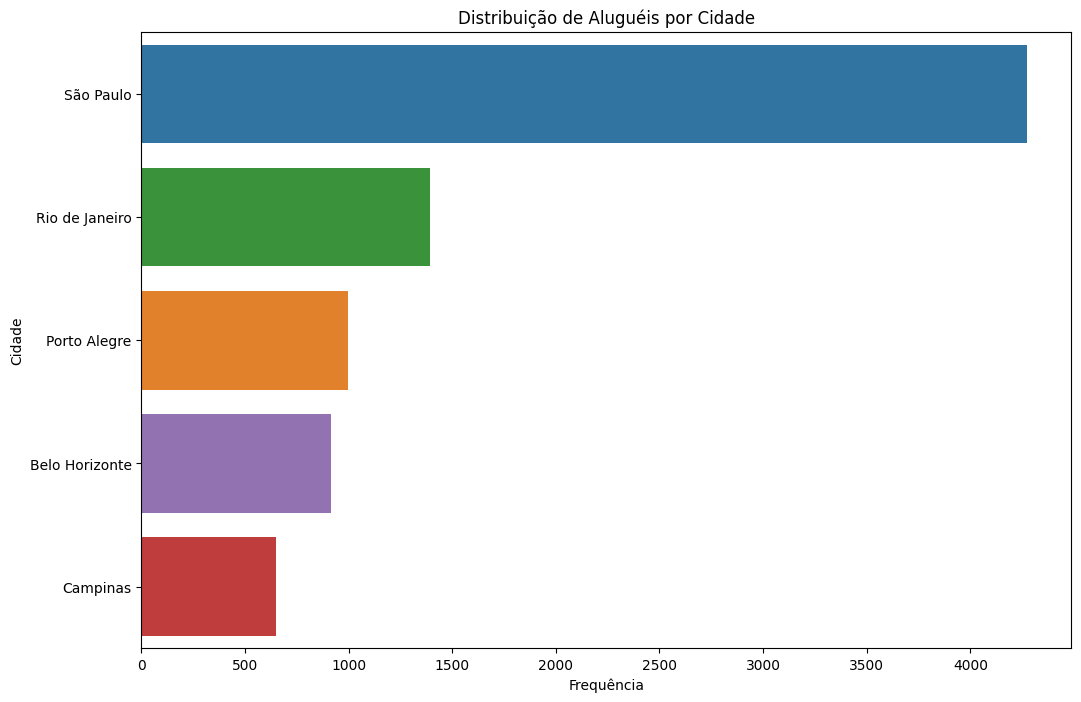

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='city', data=df, order=df['city'].value_counts().index, hue='city')
plt.title('Distribuição de Aluguéis por Cidade')
plt.xlabel('Frequência')
plt.ylabel('Cidade')
plt.show()

- Maioria dos alugueis concentrados na cidade de São Paulo

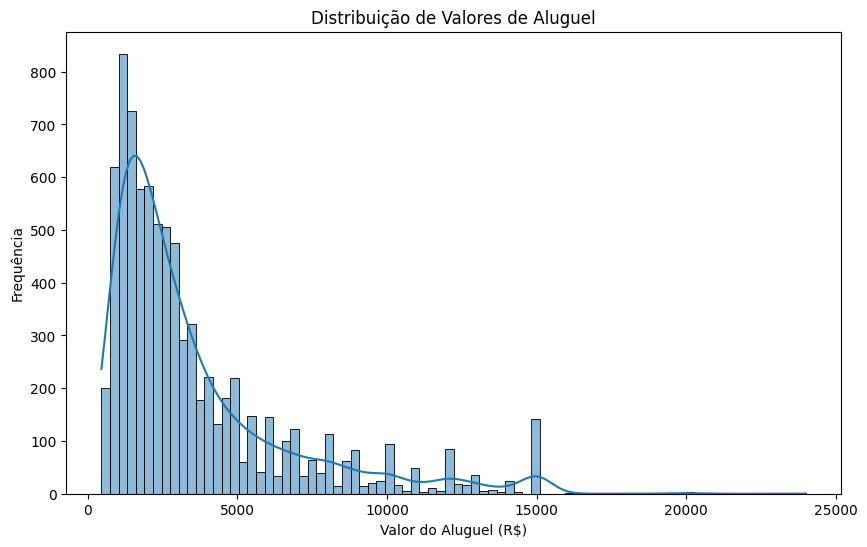

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rent amount '], kde=True)
plt.title('Distribuição de Valores de Aluguel')
plt.xlabel('Valor do Aluguel (R$)')
plt.ylabel('Frequência')
plt.show()

- Maioria dos alugueis está a baixo da faxa de 5.000 mil reais.

## Quartos e Banheiros

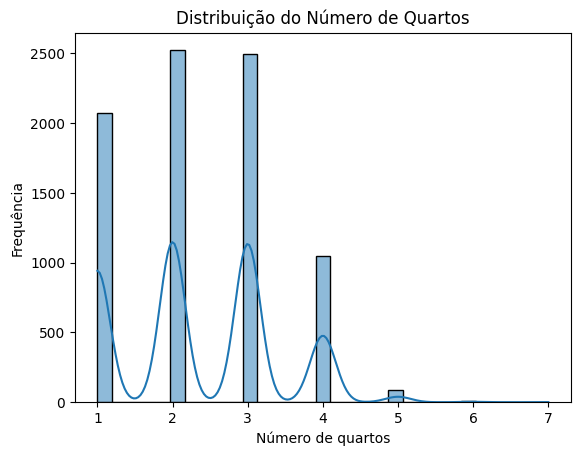

In [ ]:
sns.histplot(df['rooms'], kde=True)
plt.xlabel('Número de quartos')
plt.ylabel('Frequência')
plt.title('Distribuição do Número de Quartos')
plt.show()

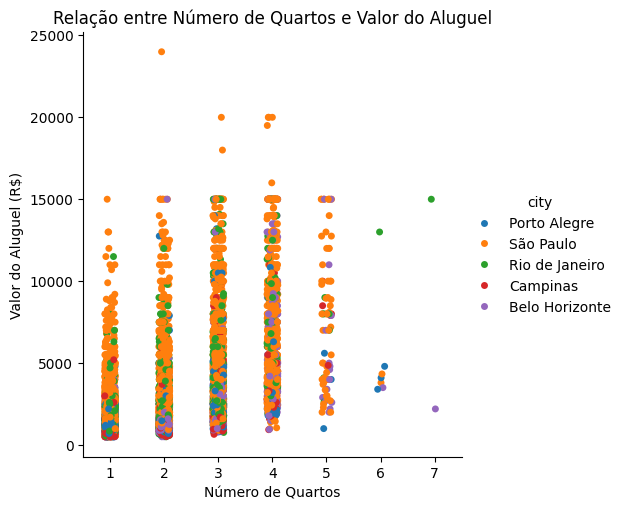

In [ ]:
sns.catplot(x='rooms', y='rent amount ', data=df, hue='city')
plt.title('Relação entre Número de Quartos e Valor do Aluguel')
plt.xlabel('Número de Quartos')
plt.ylabel('Valor do Aluguel (R$)')
plt.show()


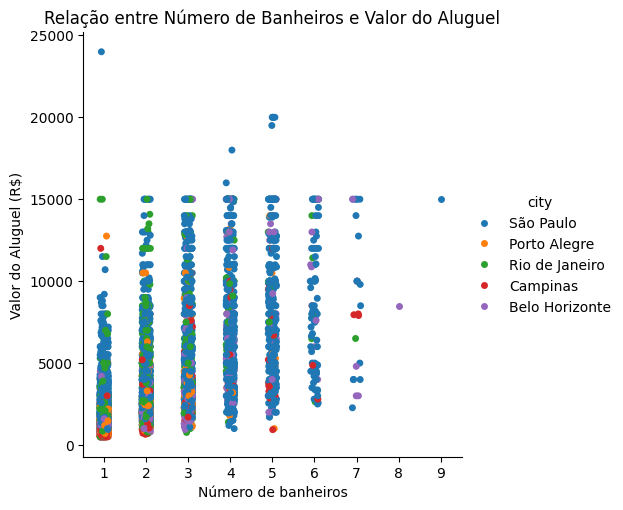

In [ ]:
sns.catplot(x='bathroom', y='rent amount ', data=df, hue='city')
plt.title('Relação entre Número de Banheiros e Valor do Aluguel')
plt.xlabel('Número de banheiros')
plt.ylabel('Valor do Aluguel (R$)')
plt.show()

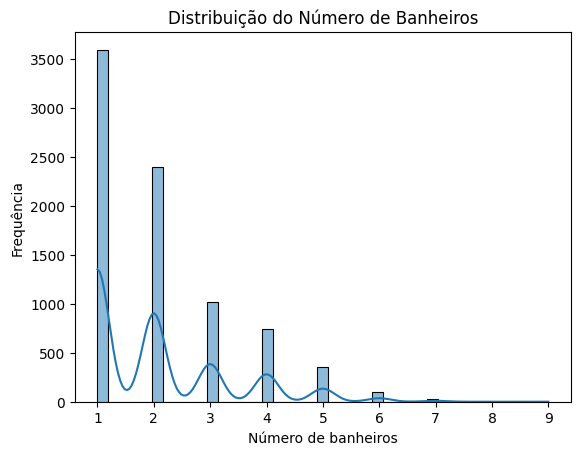

In [ ]:
sns.histplot(df['bathroom'], kde=True)
plt.xlabel('Número de banheiros')
plt.ylabel('Frequência')
plt.title('Distribuição do Número de Banheiros')
plt.show()

- A maioria dos alugues estão distribuidos em 1/2 banheiros e 2/3 quartos.
- Também a uma certa procura por 3-4 banheiros e 1/4 quartos.
- Existe uma quantidade consideravel de procura por 5 banheiros mas uma procura muito baixa por mais de 4 quartos.

## Animais e Mobílias

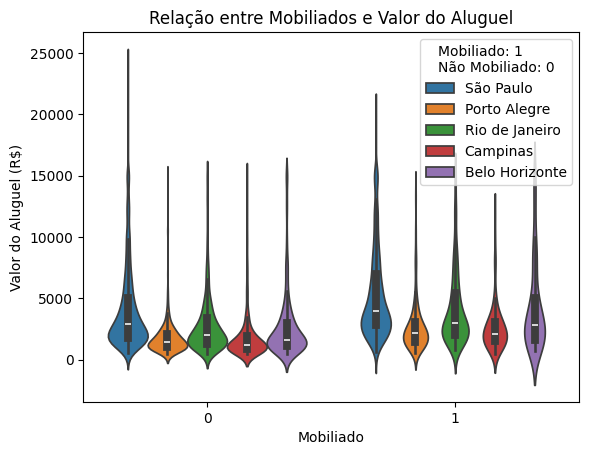

In [ ]:
sns.violinplot(x ='furniture', y ='rent amount ', data = df ,hue ='city')
plt.title('Relação entre Mobiliados e Valor do Aluguel')
plt.xlabel('Mobiliado')
plt.ylabel('Valor do Aluguel (R$)')
plt.legend(title='Mobiliado: 1\nNão Mobiliado: 0')
plt.show()

- Maior procura por apartamentos não mobiliados

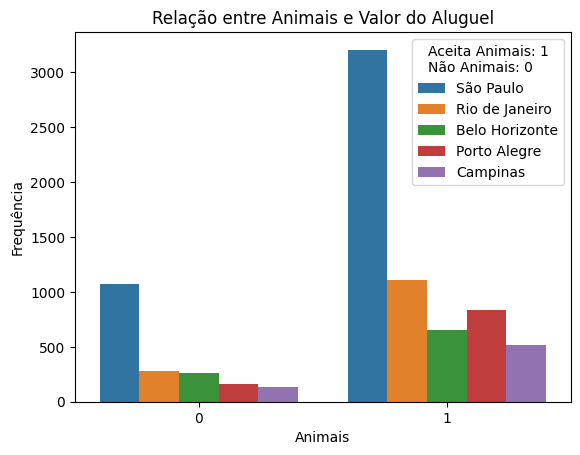

In [ ]:
sns.countplot(x='animal',hue = 'city', data=df)
plt.title('Relação entre Animais e Valor do Aluguel')
plt.xlabel('Animais')
plt.ylabel('Frequência')
plt.legend(title='Aceita Animais: 1\nNão Animais: 0')
plt.show()

- Grande maioria aceita animais na propriedade

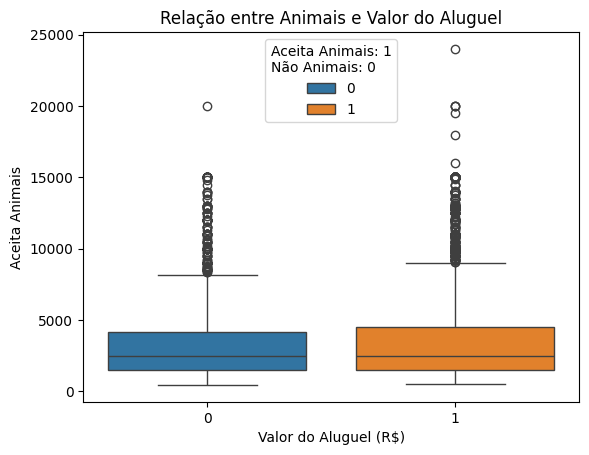

In [ ]:
sns.boxplot(y='rent amount ',x ='animal', data=df, hue='animal')
plt.title('Relação entre Animais e Valor do Aluguel')
plt.xlabel('Valor do Aluguel (R$)')
plt.ylabel('Aceita Animais')
plt.legend(title='Aceita Animais: 1\nNão Animais: 0')
plt.show()

- Apesar da maioria aceitar animais, o preço de aluguel é menor para os imoveis que não aceitam.

# Revisando o DataFrame

In [ ]:
df['city'].value_counts()

,count
city,
São Paulo,4273
Rio de Janeiro,1394
Porto Alegre,999
Belo Horizonte,916
Campinas,649


In [ ]:
df['city_label'] = df['city'].replace({'São Paulo': 0, 'Rio de Janeiro': 1, 'Porto Alegre' : 2, 'Belo Horizonte' : 3, 'Campinas' : 4})

In [ ]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,city_label
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618,0
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973,0
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841,2
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421,2
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836,0


>Para exportar o DataFrame:

In [ ]:
df.to_excel('houses_to_rent_limpo.xlsx', index=False)
df.to_csv('houses_to_rent_limpo.csv', index=False)

> Definindo o DataFrame pra modelagem

In [ ]:
df_treino = df.drop(['city'], axis=1)
df_treino.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,city_label
0,70,2,1,1,7,1,1,2065,3300,211,42,5618,0
1,320,4,4,0,20,1,0,1200,4960,1750,63,7973,0
2,80,1,1,1,6,1,0,1000,2800,0,41,3841,2
3,51,2,1,0,2,1,0,270,1112,22,17,1421,2
4,25,1,1,0,1,0,0,0,800,25,11,836,0


> **Verificando a correlação entre variáveis**

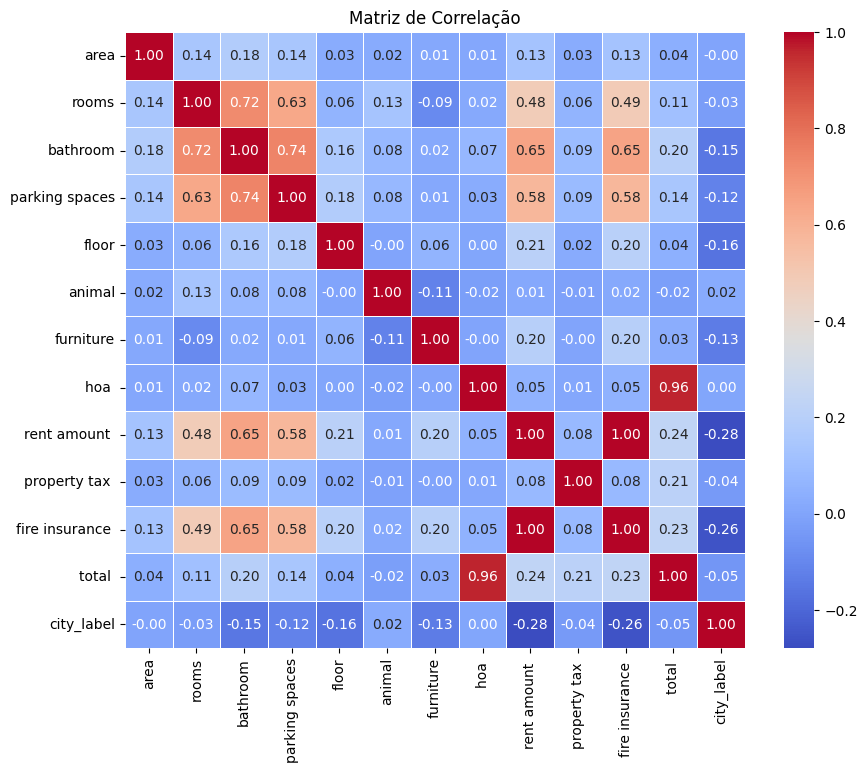

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df_treino.corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

- Estatísticas sobre o DataFrame

In [ ]:
df_treino.describe()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,city_label
count,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8.231000e+03,8231.000000,8231.000000,8231.000000,8.231000e+03,8231.000000
mean,124.579759,2.342243,2.060503,1.364233,6.583283,0.768193,0.273600,1.484767e+03,3582.276394,344.738063,46.455352,5.458473e+03,1.061353
std,601.034331,1.029864,1.255552,1.237920,6.153925,0.422012,0.445833,1.775540e+04,3138.226949,3512.011622,40.152370,1.861053e+04,1.338559
min,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,460.000000,0.000000,3.000000,5.070000e+02,0.000000
25%,54.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,4.150000e+02,1500.000000,36.000000,20.000000,2.079000e+03,0.000000
50%,80.000000,2.000000,2.000000,1.000000,5.000000,1.000000,0.000000,7.500000e+02,2500.000000,112.000000,32.000000,3.456000e+03,0.000000
75%,141.000000,3.000000,3.000000,2.000000,9.000000,1.000000,1.000000,1.512500e+03,4405.000000,332.000000,58.000000,6.394000e+03,2.000000
max,46335.000000,7.000000,9.000000,8.000000,301.000000,1.000000,1.000000,1.117000e+06,24000.000000,313700.000000,305.000000,1.120000e+06,4.000000


# Modelagem - Regressão Linear

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold

> Dividindo em conjuntos de treino e teste

> Como eu suspeitei, a variavel 'total' tava roubando pro modelo, ele tava com um bias absurdo por conta dela então removi pro treinamento.

In [ ]:
X = df_treino.drop(['rent amount ', 'total '], axis=1)
y = df_treino['rent amount ']

std = StandardScaler()
X = std.fit_transform(X)
y = std.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Aplicando validação cruzada para verificar overfitiing

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=5)
modelo = LinearRegression()

cv = cross_val_score(modelo, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("Resultados da validação cruzada:")
cv

Resultados da validação cruzada:


array([-0.00847797, -0.00695067, -0.00544244, -0.00642921, -0.01274986,
       -0.00526042, -0.02436062, -0.00299006, -0.00745809, -0.0053244 ])

> Métricas da função de custo

In [ ]:
print(f"RMSE para cada fold:\n {np.sqrt(-cv)}\n")
print(f"RMSE médio: {np.sqrt(-cv).mean()}")
print(f"Desvio padrão do RMSE: {np.sqrt(-cv).std()}")
print(f"Intervalo de 95% de confiança:{np.quantile(np.sqrt(-cv), [0.025, 0.975])}")

RMSE para cada fold:
 [0.09207589 0.08337065 0.07377289 0.08018235 0.11291526 0.07252876
 0.15607889 0.05468143 0.08636023 0.07296848]

RMSE médio: 0.08849348308140212
Desvio padrão do RMSE: 0.026707230746170426
Intervalo de 95% de confiança:[0.05869708 0.14636707]


> Treinando o modelo novamente

In [ ]:
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R²: {r2}")

MSE: 0.10730435387092667
R²: 0.989101419438189


> Verificando os outliers

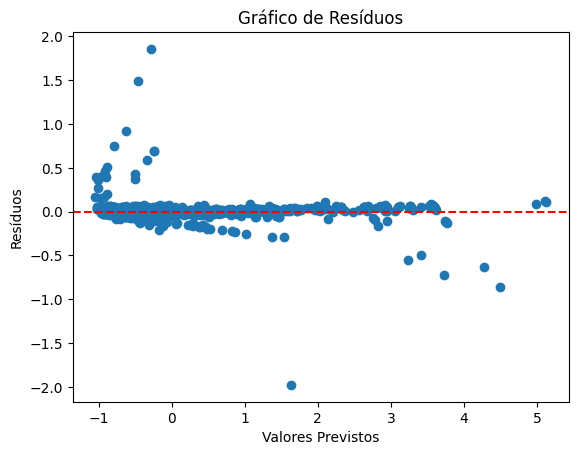

In [ ]:
residuos = y_test - y_pred
plt.scatter(y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()

> O gráfico mostra uma tendência a heterocedade um certo ponto dos erros.

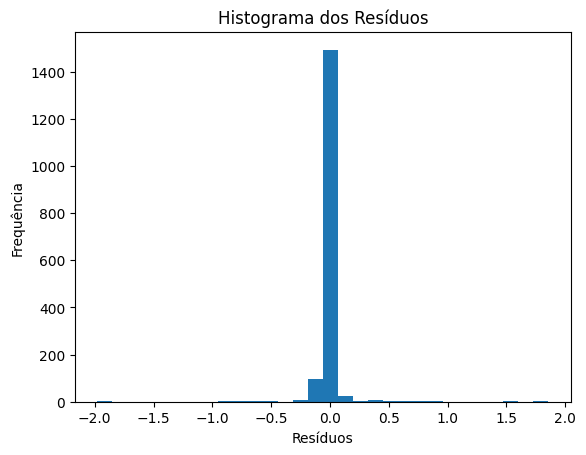

In [ ]:
plt.hist(residuos, bins=30)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

> Visualizando a linha de regressão

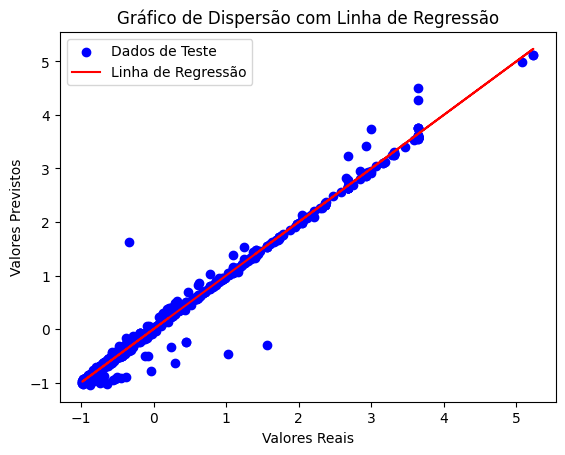

In [ ]:
plt.scatter(y_test, y_pred, color="blue", label="Dados de Teste")
plt.plot(y_test, y_test, color="red", label="Linha de Regressão")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Gráfico de Dispersão com Linha de Regressão")
plt.legend()

> Apesar de uma certa tendência a heterocidade, os coeficientes parecem em sua maioria explicar minhas variáveis.

# Considerações

Apesar de alguns aparentes Outliers, a linha de regressão esxplica bem as features, com um bias ainda alto(alguns pontos mais distantes da linha) e uma variância ok(alguns dados mais distântes do restante), tendo em mente os outliers.

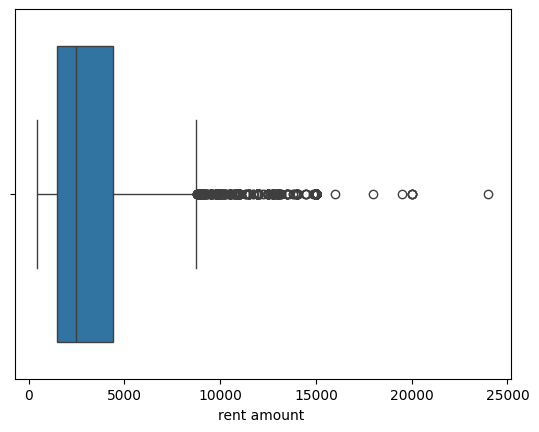

In [ ]:
sns.boxplot(x=df_treino['rent amount '])
plt.show()

Valores acima de 15.000 reais são mais sensiveis ao modelo.

>Acredito que a regularização possa ser uma solução válida.

> Além disso, seria bom refazer o pré-processar os dados realizando testes com os outiliers

> Também seria interessante a prática de feature engineering pra novas colunas como quartos por banheiros e etc, na tentiva de explicar melhor os outliers.